#MODEL -2
# **Personalized Lifestyle Recommendations**
# Purpose
- Provide actionable advice on nutrition, exercise, and stress management.
- Tailor recommendations based on user profiles using a generative AI model.
- - Collect and analyze user data (e.g., health metrics, symptoms, and lifestyle factors).

**Project Assign to :**
- Akolade Rildwan Hamzat
- Samuel Odukoya


**Deadline:** 27-Fri-2025
- Please note this notebook is for **Akolade Rildwan Hamzat**

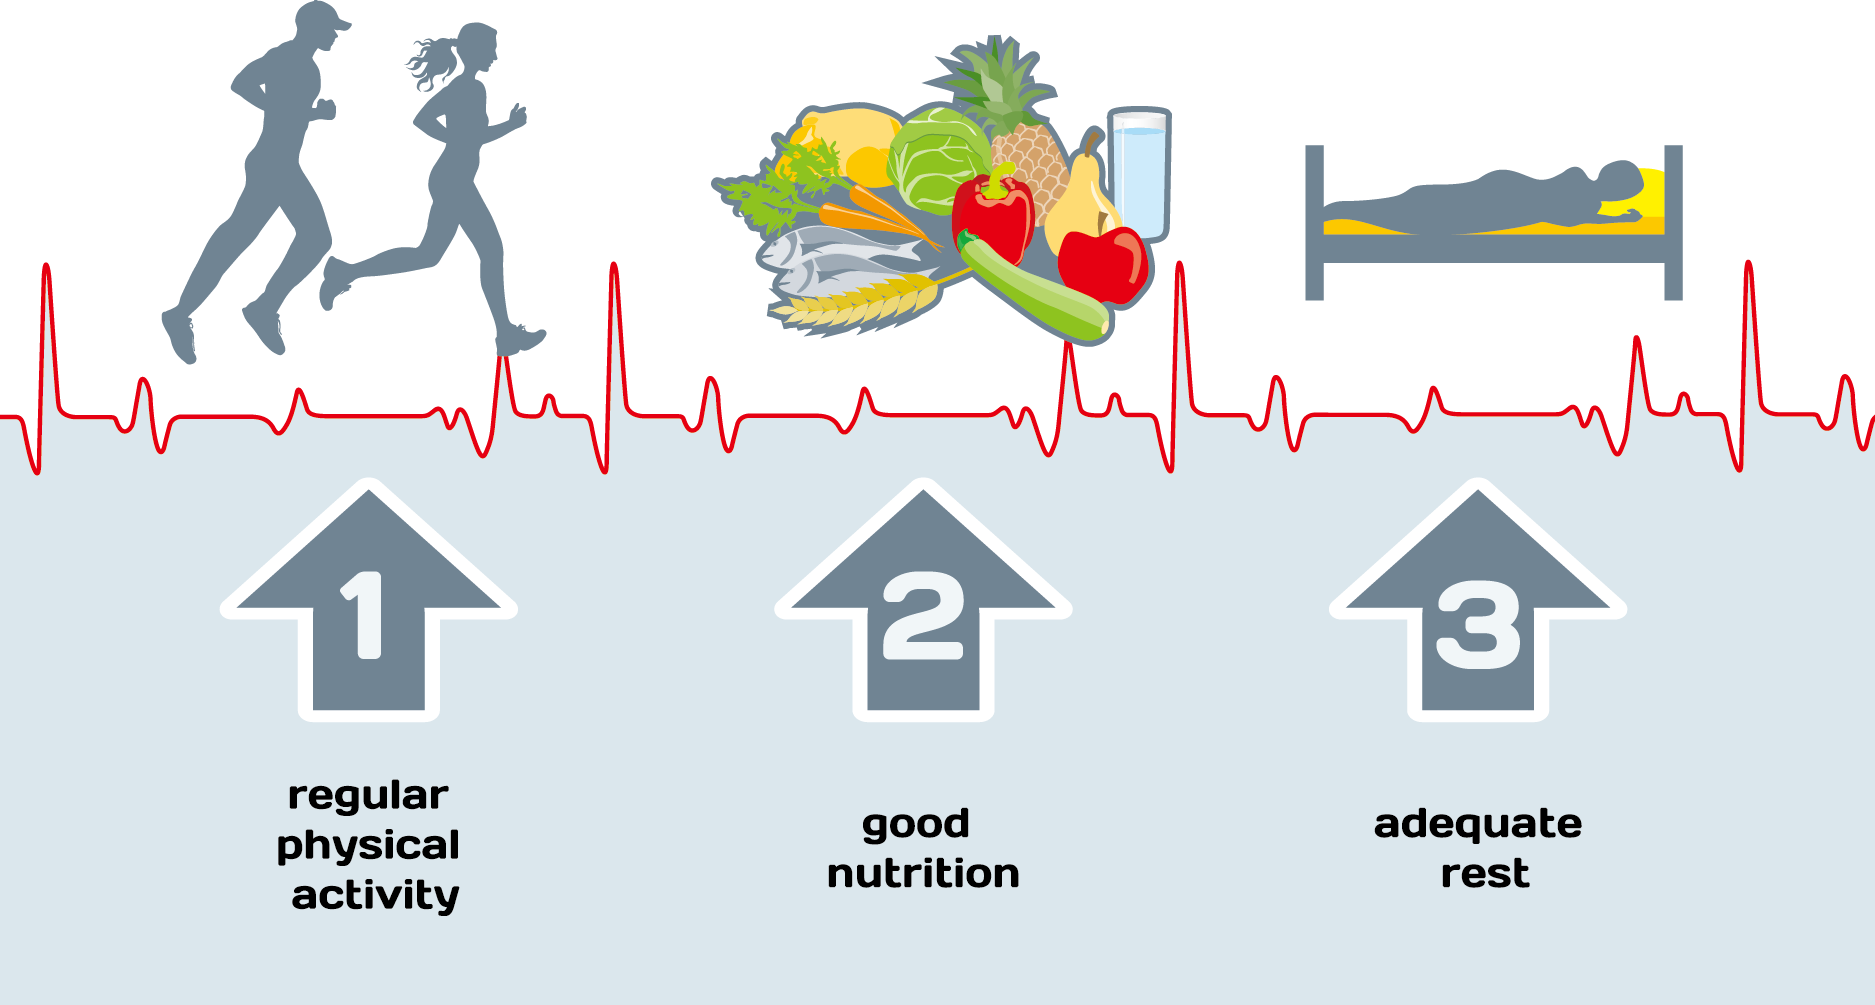

# **Lifestyle Factors Data:**
- Dietary habits.
- Physical activity levels.
- Sleep patterns.
- Stress levels.

**Model**: Machine Learning: Random Forest + Decision Tree or others

**Dataset for lifestyle:**
1. https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset/data
2.  https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset/data

**Chatbot:**  Openai any other available provider

**Dataset for chat bot:** https://docs.google.com/spreadsheets/d/1EZn8Kd930EQAXQWtqn9xkprjvXZJ6I3Fi7zEy7rl5XM/edit?gid=1589236758#gid=1589236758


**Note:** we will be getting two deliverables.
- Chatbot model
- lifesyle predictive model

### **Lifestyle Prediction Project**

In [ ]:
!pip install streamlit gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Importing the Libraries
import streamlit as st
import os
from openai import OpenAI
from dotenv import load_dotenv
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load environment variables from .env file
load_dotenv()

# Setting up OpenAI API key
if "OPENAI_API_KEY" not in os.environ:
    raise ValueError("OPENAI_API_KEY is not set in the environment.")

client = OpenAI(
    api_key=os.environ["OPENAI_API_KEY"],
)

**Step 1: Load the Dataset**

In [ ]:
df = pd.read_csv('PCOS_data.csv')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
df.isnull().count()

,0
Sl. No,541
Patient File No.,541
PCOS (Y/N),541
Age (yrs),541
Weight (Kg),541
Height(Cm),541
BMI,541
Blood Group,541
Pulse rate(bpm),541
RR (breaths/min),541


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
# Dropping the irrelevant column
df.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis=1, inplace=True)

In [ ]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Defining target and features
target_col = 'PCOS (Y/N)'
features = [col for col in df.columns if col != target_col]

In [ ]:
# Convert non-numeric columns to numeric when possible
for col in features:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes

In [ ]:
# Defining X (features) and y (target)
X = df[features]
y = df[target_col]

**Step 2: Split Data and Train the Full Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8899082568807339


In [ ]:
# Saving the model
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

**Step 3: Compute Default Values for Each Feature**

In [ ]:
default_values = {}
for col in features:
    if np.issubdtype(X_train[col].dtype, np.number):
        default_values[col] = X_train[col].mean()
    else:
        default_values[col] = X_train[col].mode()[0]

print("Computed default values for all features:")
print(default_values)

Computed default values for all features:
{' Age (yrs)': 31.34027777777778, 'Weight (Kg)': 59.604629629629635, 'Height(Cm) ': 156.59694444444446, 'BMI': 24.25532407407407, 'Blood Group': 13.743055555555555, 'Pulse rate(bpm) ': 73.10416666666667, 'RR (breaths/min)': 19.28009259259259, 'Hb(g/dl)': 11.15601851851852, 'Cycle(R/I)': 2.5694444444444446, 'Cycle length(days)': 4.923611111111111, 'Marraige Status (Yrs)': 7.666357308584686, 'Pregnant(Y/N)': 0.3888888888888889, 'No. of abortions': 0.2708333333333333, '  I   beta-HCG(mIU/mL)': 701.7841157407407, 'II    beta-HCG(mIU/mL)': 45.41203703703704, 'FSH(mIU/mL)': 16.822171296296297, 'LH(mIU/mL)': 7.338240740740741, 'FSH/LH': 6.946481481481482, 'Hip(inch)': 37.870370370370374, 'Waist(inch)': 33.736111111111114, 'Waist:Hip Ratio': 0.8917592592592593, 'TSH (mIU/L)': 3.0589421296296297, 'AMH(ng/mL)': 153.23842592592592, 'PRL(ng/mL)': 24.317430555555553, 'Vit D3 (ng/mL)': 42.610349537037045, 'PRG(ng/mL)': 0.6714444444444445, 'RBS(mg/dl)': 100.2

**Step 4: Build the Recommendation Function**

In [ ]:
# Selected actionable features for user input:
selected_features = ['BMI', 'Weight gain(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

def generate_recommendations_partial(user_input):
    """
    Generate lifestyle recommendations using the OpenAI API, based on partial user input.

    Parameters:
      user_input (dict): Must contain keys for:
                         'BMI', 'Weight gain(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'.

    Returns:
      list: A list of personalized lifestyle recommendations.
    """

    full_input = {}
    for key in default_values:
        if key in user_input:
            full_input[key] = user_input[key]
        else:
            full_input[key] = default_values[key]

    # Creating a DataFrame for prediction.
    input_df = pd.DataFrame([full_input])

    # Getting the prediction from the model.
    prediction = model.predict(input_df)[0]
    risk_status = "higher risk" if prediction == 1 else "favorable risk"

    # Create a prompt for OpenAI's API.
    prompt = (
        f"Based on the following user data: {full_input}, "
        f"the model prediction indicates a {risk_status} of health issues. "
        "Provide personalized lifestyle recommendations considering balanced nutrition, "
        "physical activity, and healthy habits. "
        "Format your response as bullet points."
    )

    try:
        response = client.chat_completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt},
            ],
            temperature=0.7,
            max_tokens=150,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0
        )
        rec_text = response.choices[0].message.content.strip()
        # Split recommendations by new lines and filter out empty items.
        recommendations = [line.strip() for line in rec_text.split('\n') if line.strip()]
    except Exception as e:
        recommendations = [f"An error occurred while generating recommendations: {e}"]

    return recommendations

**Step 5: Streamlit Frontend**

In [ ]:
st.title("Lifestyle Prediction & Recommendation System")
st.write("Provide your details below to receive personalized lifestyle recommendations.")

2025-02-28 07:49:48.986 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:49.066 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-28 07:49:49.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:49.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:49.069 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:49.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:49.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Input for BMI using a number input
bmi_input = st.number_input("BMI", value=25.0, min_value=10.0, max_value=50.0, step=0.1)

2025-02-28 07:49:50.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:50.752 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:50.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:50.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:50.755 Session state does not function when running a script without `streamlit run`
2025-02-28 07:49:50.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:50.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Binary inputs for Weight gain, Fast food consumption, and Regular Exercise using radio buttons
weight_gain_input = st.radio("Weight gain (Y/N)", options=["Yes", "No"], index=1)
fast_food_input = st.radio("Fast food consumption (Y/N)", options=["Yes", "No"], index=1)
reg_exercise_input = st.radio("Regular Exercise (Y/N)", options=["Yes", "No"], index=1)

2025-02-28 07:49:52.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:52.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Converting the user selections to binary values: Yes -> 1, No -> 0.
weight_gain_val = 1 if weight_gain_input == "Yes" else 0
fast_food_val = 1 if fast_food_input == "Yes" else 0
reg_exercise_val = 1 if reg_exercise_input == "Yes" else 0

In [ ]:
# Building the partial user input dictionary
user_input = {
    'BMI': bmi_input,
    'Weight gain(Y/N)': weight_gain_val,
    'Fast food (Y/N)': fast_food_val,
    'Reg.Exercise(Y/N)': reg_exercise_val
}

In [ ]:
# When the user clicks the button, generate and display recommendations
if st.button("Get Recommendations"):
    recs = generate_recommendations_partial(user_input)
    st.write("Your Lifestyle Recommendations:")
    for rec in recs:
        st.write("- " + rec)

2025-02-28 07:49:56.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:56.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:56.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:56.977 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-28 07:49:56.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
